In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [20]:
# Importing dataset - the generated simulator data
data = pd.read_csv('../testdata', delimiter=",")
#data = pd.read_csv('../data/containerData.csv', delimiter=",")
data.head()

,Unnamed: 0,Timestamp,ID,Temperature(celsius),Target_Temperature(celsius),Power,PowerConsumption,ContentType,O2,CO2,Time_Door_Open,Maintenance_Required,Defrost_Cycle
0,1.000000,2019-07-01 T11:40 Z,101,3.118249,4,20.123195,6.760044,4,3,2,7.875000,0,6
1,1.000333,2019-07-01 T11:40 Z,101,3.118249,4,0.000000,7.480005,4,12,0,6.453978,0,6
2,1.000667,2019-07-01 T11:40 Z,101,4.718249,4,0.000000,8.914852,4,19,2,10.768416,0,6
3,1.001000,2019-07-01 T11:40 Z,101,7.118249,4,0.000000,8.969180,4,3,3,4.143379,0,6
4,1.001334,2019-07-01 T11:40 Z,101,10.318249,4,0.000000,6.540984,4,9,2,10.497382,0,6


In [21]:
# Convert dataset into array for the independent variables (features)
X = np.asarray(data[['Temperature(celsius)','Target_Temperature(celsius)','Power','PowerConsumption','ContentType','O2','CO2','Time_Door_Open','Maintenance_Required','Defrost_Cycle']])
#X = np.asarray(data[['Temperature(celsius)', 'Door_Open','Target_Temperature(celsius)','Amp','ContentType','CumulativePowerConsumption'
 #                         ,'Humidity','CO2','Defrost_Cycle']])
X[0:5]

array([[ 3.12,  4.  , 20.12,  6.76,  4.  ,  3.  ,  2.  ,  7.88,  0.  ,
         6.  ],
       [ 3.12,  4.  ,  0.  ,  7.48,  4.  , 12.  ,  0.  ,  6.45,  0.  ,
         6.  ],
       [ 4.72,  4.  ,  0.  ,  8.91,  4.  , 19.  ,  2.  , 10.77,  0.  ,
         6.  ],
       [ 7.12,  4.  ,  0.  ,  8.97,  4.  ,  3.  ,  3.  ,  4.14,  0.  ,
         6.  ],
       [10.32,  4.  ,  0.  ,  6.54,  4.  ,  9.  ,  2.  , 10.5 ,  0.  ,
         6.  ]])

In [22]:
# Convert dataset into array for the dependent (objective) variables
y = np.asarray(data['Maintenance_Required'])
#y = np.asarray(data['Maintainence_Required'])
y [0:5]

array([0, 0, 0, 0, 0])

In [23]:
# Normalize/standardize (mean = 0 and standard deviation = 1) 
# your features before applying machine learning techniques.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.72,  0.  ,  2.62, -0.43,  0.  , -1.14,  0.43, -0.11, -0.31,
         0.  ],
       [-0.72,  0.  , -0.64,  0.27,  0.  ,  0.33, -1.37, -0.82, -0.31,
         0.  ],
       [-0.57,  0.  , -0.64,  1.67,  0.  ,  1.48,  0.43,  1.35, -0.31,
         0.  ],
       [-0.34,  0.  , -0.64,  1.72,  0.  , -1.14,  1.32, -1.99, -0.31,
         0.  ],
       [-0.05,  0.  , -0.64, -0.64,  0.  , -0.16,  0.43,  1.22, -0.31,
         0.  ]])

In [24]:
## split the dataset into train and test to estiamte model accuracy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2400, 10) (2400,)
Test set: (600, 10) (600,)


In [25]:
## As we are trying to acheive a binary classification, we use Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
## Predict using the trained LR model
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [27]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.92, 0.08],
       [0.09, 0.91],
       [0.91, 0.09],
       ...,
       [0.89, 0.11],
       [0.91, 0.09],
       [0.92, 0.08]])

In [28]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


1.0

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[ 52   0]
 [  0 548]]
[[ 52   0]
 [  0 548]]


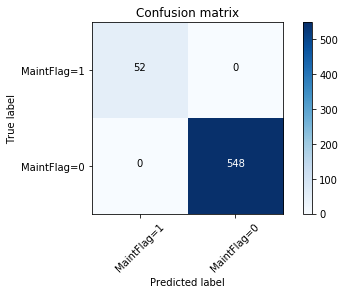

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MaintFlag=1','MaintFlag=0'],normalize= False,  title='Confusion matrix')

In [31]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       548
           1       1.00      1.00      1.00        52

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [32]:

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)


0.09896703047434219

In [17]:
import pickle

#loading a model from a file called model.pkl
#serializing our model to a file called model.pkl
pickle.dump(LR, open("model_logistic_regression.pkl","wb"))